# Split Video into Frames

This uses FFMPEG to split the video into frames.

In [16]:
import inspect
import os
import sys
import pathlib
import time

import subprocess 
import numpy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

FFMPEG_BINARY = "C:\\Program Files (x86)\\ffmpeg\\ffmpeg-20180325-5b31dd1-win64-static\\bin\\ffmpeg.exe"

# filename = inspect.getframeinfo(inspect.currentframe()).filename
# HOME = os.path.dirname(os.path.abspath(filename))
HOME = os.environ.get('HOME_PATH')
VIDEO_PATH = os.path.join(HOME, "video")

VIDEO_NAME = "20180326_071412_NF.mp4"

In [ ]:
VIDEO_PATH

In [18]:
# command = [ FFMPEG_BINARY, '-i', SAMPLE_VIDEO]
# proc = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [19]:
# print proc.stdout.read()
# print proc.stderr.read()

In [20]:
def getFrameFromImage(src):

    command = [ FFMPEG_BINARY,
                '-i', src,
                '-f', 'image2pipe',
                '-pix_fmt', 'rgb24',
                '-vcodec', 'rawvideo', '-']
    proc = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, bufsize=10**8)
    
    # read 1920*1080*3 bytes (= 1 frame)
    raw_image = proc.stdout.read(1920*1080*3)
    # transform the byte read into a numpy array
    image =  numpy.fromstring(raw_image, dtype='uint8')
    image = image.reshape((1080, 1920,3))
    # throw away the data in the pipe's buffer.
    proc.stdout.flush()
    
    return image


In [21]:
sampleVideoPath = os.path.join(VIDEO_PATH, VIDEO_NAME)
image = getFrameFromImage(sampleVideoPath)

In [22]:
def showImage(image):

    plt.imshow( image )

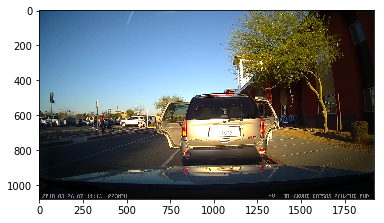

In [23]:
showImage(image)

In [24]:
def showImageLuminance(image):
    lum_img = image[:,:,0]
    plt.imshow(lum_img, cmap="cool")
    plt.colorbar()

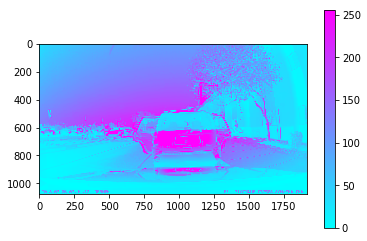

In [25]:
showImageLuminance(image)

In [26]:
def splitFramesFromVideo(src, dest):
    print("Getting frames from ", src)
    
    videoName = os.path.split(src)[1]
    pathlib.Path(dest).mkdir(parents=True, exist_ok=True) 

    command = [ FFMPEG_BINARY,
                '-i', src,
                '-r', '1/1',
                dest + '/' + videoName + '-frame-%03d.png']
    proc = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, bufsize=10**8)
    proc.stderr.read()

In [27]:
# sampleVideoPath = os.path.join(VIDEO_PATH, VIDEO_NAME)
# dest = os.path.join(HOME,'frames', VIDEO_NAME)

# splitFramesFromVideo(sampleVideoPath, dest)

# Pipeline Part 1

In [28]:
PIPELINE_1 = os.path.join(HOME, "pipeline", "1. videos")
PIPELINE_2 = os.path.join(HOME, "pipeline", "2. frames")


In [ ]:
# Watch folder for videos to show up

dest = PIPELINE_2
before = dict ([(f, None) for f in os.listdir (PIPELINE_1)])
i = 0
while i < 10:
    print("Checking ", PIPELINE_1)
    after = dict ([(f, None) for f in os.listdir (PIPELINE_1)])
#     added = [f for f in after if not f in before]
#     removed = [f for f in before if not f in after]
    
    for file in after:
        if file.endswith('mp4'):
            print(file)
            src =  os.path.join(PIPELINE_1, file)
            splitFramesFromVideo(src, dest)
            
            # remove file once processed
            os.remove(src)
    
#     if added: print("Added: ", ", ".join (added))
#     if removed: print("Removed: ", ", ".join (removed))
#     before = after
    time.sleep(10)
    
    i += 1

# References

- http://zulko.github.io/blog/2013/09/27/read-and-write-video-frames-in-python-using-ffmpeg/
- Image Processing in Python https://matplotlib.org/users/image_tutorial.html